In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten # type: ignore
from tensorflow.keras.optimizers import Adam  # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.applications import ResNet50 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorfl  ow.keras.preprocessing.image import ImageDataGenerator # type: ignore

In [2]:
train_data_gen=ImageDataGenerator(rescale=1./255)
validation_data_gen=ImageDataGenerator(rescale=1./255)
test_data_gen=ImageDataGenerator(rescale=-1./255)

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
# preprocessing train images
train_generator=train_data_gen.flow_from_directory(
     'Deepfake_dataset/Train',   # label all images inside angry as angry and with all 
     target_size=(48,48),
     batch_size=64,
     color_mode="grayscale",
     class_mode='categorical'
)


# preprocessing validation images
validation_generator=validation_data_gen.flow_from_directory(
     'Deepfake_dataset/Validation',   
     target_size=(48,48),
     batch_size=64,
     color_mode="grayscale",
     class_mode='categorical'
)

test_generator=test_data_gen.flow_from_directory(
     'Deepfake_dataset/Test',   
     target_size=(48,48),
     batch_size=64,
     color_mode="grayscale",
     class_mode='categorical'
)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


In [8]:
deepfake_model=Sequential()
deepfake_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
deepfake_model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
deepfake_model.add(MaxPooling2D(pool_size=(2,2)))
deepfake_model.add(Dropout(0.25))

deepfake_model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
deepfake_model.add(MaxPooling2D(pool_size=(2,2)))
deepfake_model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
deepfake_model.add(MaxPooling2D(pool_size=(2,2)))
deepfake_model.add(Dropout(0.25))

deepfake_model.add(Flatten())
deepfake_model.add(Dense(1024,activation='relu'))
deepfake_model.add(Dropout(0.25))
deepfake_model.add(Dense(2,activation='softmax'))



deepfake_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

c:\Users\kushr\OneDrive\Desktop\Deepfake_Detection\deepfake\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
deepfake_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,482 (8.93 MB)

 Trainable params: 2,340,482 (8.93 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

deepfake_model_info = deepfake_model.fit(
    train_generator,
    steps_per_epoch=140002//128,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=39428// 128,
    callbacks=[early_stopping]
)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.6137 - loss: 0.6415

c:\Users\kushr\OneDrive\Desktop\Deepfake_Detection\deepfake\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 359s 797ms/step - accuracy: 0.6138 - loss: 0.6413 - val_accuracy: 0.7386 - val_loss: 0.5328
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 424s 948ms/step - accuracy: 0.7677 - loss: 0.4869 - val_accuracy: 0.7584 - val_loss: 0.4922
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 301s 674ms/step - accuracy: 0.7949 - loss: 0.4344 - val_accuracy: 0.7812 - val_loss: 0.4585
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 283s 634ms/step - accuracy: 0.8186 - loss: 0.3950 - val_accuracy: 0.8153 - val_loss: 0.4021
Epoch 5/10
396/448 ━━━━━━━━━━━━━━━━━━━━ 24s 468ms/step - accuracy: 0.8465 - loss: 0.3461

C:\Users\kushr\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 219s 489ms/step - accuracy: 0.8467 - loss: 0.3457 - val_accuracy: 0.8273 - val_loss: 0.3781
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 212s 471ms/step - accuracy: 0.8580 - loss: 0.3223 - val_accuracy: 0.8403 - val_loss: 0.3572
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 218s 488ms/step - accuracy: 0.8705 - loss: 0.2981 - val_accuracy: 0.8509 - val_loss: 0.3234
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 203s 453ms/step - accuracy: 0.8806 - loss: 0.2804 - val_accuracy: 0.8495 - val_loss: 0.3208
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 197s 440ms/step - accuracy: 0.8829 - loss: 0.2686 - val_accuracy: 0.8707 - val_loss: 0.2913
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 163s 364ms/step - accuracy: 0.8902 - loss: 0.2587 - val_accuracy: 0.8735 - val_loss: 0.2799


In [11]:
# Evaluate on the test dataset
test_loss, test_accuracy = deepfake_model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

c:\Users\kushr\OneDrive\Desktop\Deepfake_Detection\deepfake\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


171/171 ━━━━━━━━━━━━━━━━━━━━ 95s 558ms/step - accuracy: 0.4921 - loss: 1.2994
Test Accuracy: 49.67%


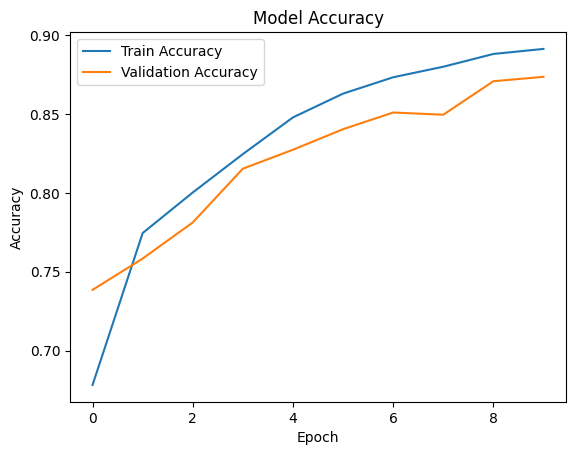

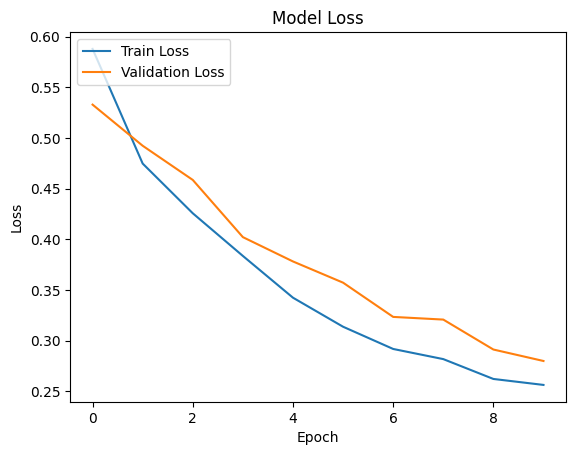

In [14]:
import matplotlib.pyplot as plt # type: ignore

# Plot accuracy curves
plt.plot(deepfake_model_info.history['accuracy'], label='Train Accuracy')
plt.plot(deepfake_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss curves
plt.plot(deepfake_model_info.history['loss'], label='Train Loss')
plt.plot(deepfake_model_info.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')  
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()